In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation
from sklearn.preprocessing import LabelBinarizer
import sklearn
import pandas as pd
import xgboost as xg

%matplotlib inline

In [9]:
df = pd.read_csv("../results/melted_hackseq.csv")
df

In [49]:
dummy_df = pd.get_dummies(df).dropna(axis=0)
dummy_df.shape

(12984, 4514)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12977, 12978, 12979, 12980, 12981, 12982, 12983, 12984, 12985,
            12986],
           dtype='int64', length=12984)

In [55]:
cols = dummy_df.columns.tolist()
cols.append(cols.pop(cols.index('lfc')))
dummy_df = dummy_df.reindex(columns= cols)

In [56]:
dummy_df.columns[-1]

'lfc'

In [57]:
X, y = dummy_df.iloc[:,:-1].values, dummy_df.iloc[:,-1].values

In [58]:
model = GradientBoostingRegressor()
cross_val = cross_validation.cross_val_score(estimator=model, X=X, y=y, cv = 5, scoring="mean_squared_error")
sum(abs(cross_val))/len(cross_val)

array([-2.51362872, -2.83527368, -2.50070136, -5.03231367, -1.77300729])

In [61]:
-sum([-2.51362872, -2.83527368, -2.50070136, -5.03231367, -1.77300729])/5

2.930984944

In [60]:
model = xg.XGBRegressor()
cross_val = cross_validation.cross_val_score(estimator=model, X=X, y=y, cv = 5, scoring="mean_squared_error")

-2.717733243254866

In [62]:
-sum(cross_val)/len(cross_val)

2.717733243254866

In [63]:
2.930984944/2.717733243254866

1.0784667521267597

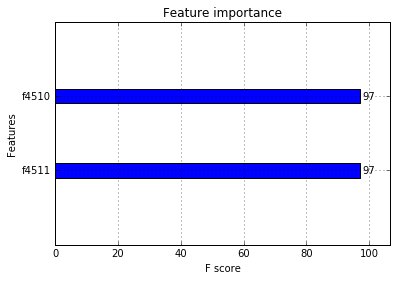

In [33]:
xg.plot_importance(model)

In [42]:
dummy_df.columns.values

array(['GC count', 'Amino Acid Cut position', 'NGGX_pd.Order2_P0', ...,
       'drug_6TG_2ug/mL', 'drug_AZD_200nM', 'drug_PLX_2uM'], dtype=object)

In [44]:
[i for i,j in enumerate(dummy_df.columns.values) if j == "lfc"]

[149]